# Importing the data


In [2]:
import requests
import csv
from bs4 import BeautifulSoup

BASE_URL = "https://www.the-numbers.com/movie/budgets/all/{page}"

NUM_PAGES = 5  # number of pages to scrape (set 5 for faster running, feel free to change it)
OUTPUT_FILE = "movie_budgets.csv"
movies_data = []
for page in range(1, NUM_PAGES + 1):
    url = BASE_URL.format(page=(page - 1) * 100)
    response = requests.get(url)

    if response.status_code != 200:
        print(f"Failed to retrieve page {page}")
        continue

    soup = BeautifulSoup(response.text, "html.parser")
    table = soup.find("table")

    rows = table.find_all("tr")[1:] if table else []

    for row in rows:
        cols = row.find_all("td")
        if len(cols) < 5:
            continue

        rank = cols[0].text.strip()
        release_date = cols[1].text.strip()
        movie_title = cols[2].text.strip()
        production_budget = cols[3].text.strip()
        domestic_gross = cols[4].text.strip()
        worldwide_gross = cols[5].text.strip() if len(cols) > 5 else "N/A"
        movies_data.append([rank, release_date, movie_title, production_budget, domestic_gross, worldwide_gross])

    print(f"Scraped page {page}")

with open(OUTPUT_FILE, "w", newline="", encoding="utf-8") as f:
    writer = csv.writer(f)
    writer.writerow(["Rank", "Release Date", "Movie Title", "Production Budget", "Domestic Gross", "Worldwide Gross"])
    writer.writerows(movies_data)

Scraped page 1
Scraped page 2
Scraped page 3
Scraped page 4
Scraped page 5


# Data Cleaning


In [3]:
import pandas as pd

INPUT_FILE = "movie_budgets.csv"
df = pd.read_csv(INPUT_FILE)
df["Release Date"] = pd.to_datetime(df["Release Date"], errors="coerce")
df["Domestic Gross"] = df["Domestic Gross"].replace('[\$,]', '', regex=True).astype(float)  #Converting to numeric (remove "$" and ",")
df.drop(df[(df["Domestic Gross"] == 0) & (df["Release Date"].dt.year < 2025)].index, inplace=True)
df["Production Budget"] = df["Production Budget"].replace('[\$,]', '', regex=True).astype(float)
df.to_csv(INPUT_FILE, index=False)


In [4]:
df.head()

,Rank,Release Date,Movie Title,Production Budget,Domestic Gross,Worldwide Gross
0,1,2015-12-16,Star Wars Ep. VII: The Force Awakens,533200000.0,936662225.0,"$2,056,046,835"
1,2,2022-12-09,Avatar: The Way of Water,460000000.0,684075767.0,"$2,313,161,020"
2,3,2023-06-28,Indiana Jones and the Dial of Destiny,402300000.0,174480468.0,"$383,963,057"
3,4,2019-04-23,Avengers: Endgame,400000000.0,858373000.0,"$2,748,242,781"
4,5,2025-05-21,Mission: Impossible—The Final Reckoning,400000000.0,0.0,$0


# Fitting Linear Regression

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import ipywidgets as widgets
from ipywidgets import interactive

# Load data
INPUT_FILE = "movie_budgets.csv"
df = pd.read_csv(INPUT_FILE)
df["Release Date"] = pd.to_datetime(df["Release Date"], errors="coerce")
df["Worldwide Gross"] = df["Worldwide Gross"].replace('[\$,]', '', regex=True).astype(float)
df["Production Budget"] = df["Production Budget"].replace('[\$,]', '', regex=True).astype(float)
df.drop(df[(df["Domestic Gross"] == 0) & (df["Release Date"].dt.year < 2025)].index, inplace=True)

X = df[['Production Budget']]  # Independent variable (Budget)
y = df['Worldwide Gross']  # Dependent variable (Worldwide Gross)

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Scale both axes to e8
X_scaled = df['Production Budget'] / 1e8
y_scaled = df['Worldwide Gross'] / 1e8

# Function for updating the plot based on the coefficient and intercept values
def plot_regression(coef=0, intercept=0):
    y_pred_custom = coef * X_scaled + intercept

    plt.figure(figsize=(6, 6))
    plt.scatter(X_scaled, y_scaled, color='blue', alpha=0.7, label='Data points')
    plt.plot(X_scaled, y_pred_custom, color='red', linewidth=2, label=f'Line: y = {intercept:.2f} + {coef:.4f} * x')
    plt.title('Worldwide Revenue vs Production Budget', fontsize=18)
    plt.xlabel('Production Budget (in $100M)', fontsize=14)
    plt.ylabel('Worldwide Revenue (in $100M)', fontsize=14)

    plt.legend()
    plt.grid(True)
    plt.show()

# Create interactive sliders for coefficient and intercept
interactive_plot = interactive(plot_regression,
                               coef=widgets.FloatSlider(value=model.coef_[0], min=-10, max=10, step=0.01, description='Coefficient:'),
                               intercept=widgets.FloatSlider(value=model.intercept_, min=-10, max=10, step=0.01, description='Intercept:'))
display(interactive_plot)
print(f"Initial Linear Regression Equation: Worldwide Gross = {model.intercept_:.2f} + ({model.coef_[0]:.4f}) * Budget")


interactive(children=(FloatSlider(value=3.5602495500400893, description='Coefficient:', max=10.0, min=-10.0, s…

Initial Linear Regression Equation: Worldwide Gross = -46138426.59 + (3.5602) * Budget


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import ipywidgets as widgets
from ipywidgets import interactive

# Load data
INPUT_FILE = "movie_budgets.csv"
df = pd.read_csv(INPUT_FILE)
df["Release Date"] = pd.to_datetime(df["Release Date"], errors="coerce")
df["Worldwide Gross"] = df["Worldwide Gross"].replace('[\$,]', '', regex=True).astype(float)
df["Production Budget"] = df["Production Budget"].replace('[\$,]', '', regex=True).astype(float)
df.drop(df[(df["Domestic Gross"] == 0) & (df["Release Date"].dt.year < 2025)].index, inplace=True)

X = df[['Production Budget']]  # Independent variable (Budget)
y = df['Worldwide Gross']  # Dependent variable (Worldwide Gross)

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Scale both axes to e8
X_scaled = df['Production Budget'] / 1e8
y_scaled = df['Worldwide Gross'] / 1e8

# Function to update the plot based on the coefficient and intercept values
def plot_regression(coef=0, intercept=0):
    # Create a new prediction based on the coefficient and intercept
    y_pred_custom = coef * X_scaled + intercept

    # Randomly select 100 points for plotting residuals
    random_indices = np.random.choice(len(df), 100, replace=False)
    X_random = X_scaled.iloc[random_indices]
    y_random = y_scaled.iloc[random_indices]
    y_pred_random = coef * X_random + intercept

    # Plot the data and regression line
    plt.figure(figsize=(6, 6))
    plt.scatter(X_scaled, y_scaled, color='blue', alpha=0.7, label='Data points')
    plt.plot(X_scaled, y_pred_custom, color='red', linewidth=2, label=f'Line: y = {intercept:.2f} + {coef:.4f} * x')

    # Plot vertical lines for residuals
    for i in range(len(X_random)):
        plt.plot([X_random.iloc[i], X_random.iloc[i]], [y_random.iloc[i], y_pred_random.iloc[i]], color='green', alpha=0.5)

    # Title and labels
    plt.title('Worldwide Revenue vs Production Budget', fontsize=18)
    plt.xlabel('Production Budget (in $100M)', fontsize=14)
    plt.ylabel('Worldwide Revenue (in $100M)', fontsize=14)

    # Grid and legend
    plt.legend()
    plt.grid(True)
    plt.show()

# Create interactive sliders for coefficient and intercept
interactive_plot = interactive(plot_regression,
                               coef=widgets.FloatSlider(value=model.coef_[0], min=-10, max=10, step=0.01, description='Coefficient:'),
                               intercept=widgets.FloatSlider(value=model.intercept_, min=-10, max=10, step=0.01, description='Intercept:'))
display(interactive_plot)

# Print the initial model equation
print(f"Initial Linear Regression Equation: Worldwide Gross = {model.intercept_:.2f} + ({model.coef_[0]:.4f}) * Budget")


interactive(children=(FloatSlider(value=3.5602495500400893, description='Coefficient:', max=10.0, min=-10.0, s…

Initial Linear Regression Equation: Worldwide Gross = -46138426.59 + (3.5602) * Budget


# New Section

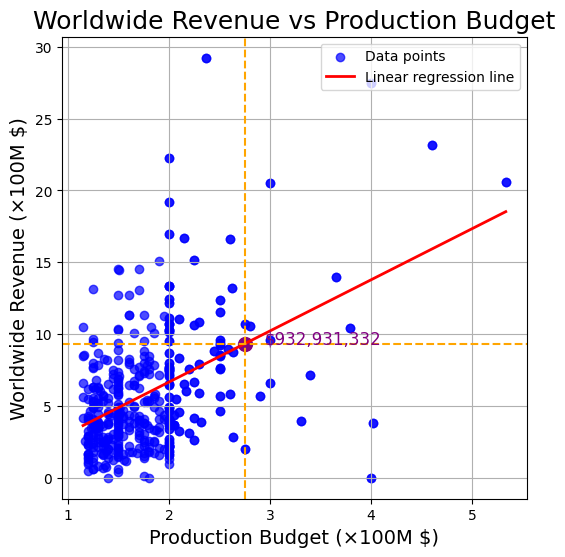

Linear Regression Equation: Worldwide Gross = -0.46 × 100M + (3.5603) * Budget (in 100M units)
Predicted Revenue for a $275M Budget: $9 × 100M


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

INPUT_FILE = "movie_budgets.csv"
df = pd.read_csv(INPUT_FILE)
df["Release Date"] = pd.to_datetime(df["Release Date"], errors="coerce")
df["Worldwide Gross"] = df["Worldwide Gross"].replace('[\$,]', '', regex=True).astype(float)
df["Production Budget"] = df["Production Budget"].replace('[\$,]', '', regex=True).astype(float)
df.drop(df[(df["Domestic Gross"] == 0) & (df["Release Date"].dt.year < 2025)].index, inplace=True)
df["Production Budget"] /= 1e8
df["Worldwide Gross"] /= 1e8
X = df[['Production Budget']]  # Independent variable (Budget)
y = df['Worldwide Gross']  # Dependent variable (Worldwide Gross)
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
budget_value = 2.75  # in 100M units
predicted_revenue = model.predict([[budget_value]])[0]  # in 100M units

plt.figure(figsize=(6, 6))
plt.scatter(df['Production Budget'], df['Worldwide Gross'], color='blue', alpha=0.7, label='Data points')
plt.plot(df['Production Budget'], y_pred, color='red', linewidth=2, label='Linear regression line')
plt.axvline(x=budget_value, color='orange', linestyle='--')
plt.axhline(y=predicted_revenue, color='orange', linestyle='--')
plt.scatter(budget_value, predicted_revenue, color='purple', s=100)
plt.title('Worldwide Revenue vs Production Budget', fontsize=18)
plt.xlabel('Production Budget (×100M $)', fontsize=14)
plt.ylabel('Worldwide Revenue (×100M $)', fontsize=14)
plt.legend()
plt.grid(True)
plt.text(budget_value + 0.2, predicted_revenue, f'${int(predicted_revenue * 100_000_000):,}', fontsize=12, color='purple')
plt.show()
print(f"Linear Regression Equation: Worldwide Gross = {model.intercept_:.2f} × 100M + ({model.coef_[0]:.4f}) * Budget (in 100M units)")
print(f"Predicted Revenue for a $275M Budget: ${int(predicted_revenue):,} × 100M")


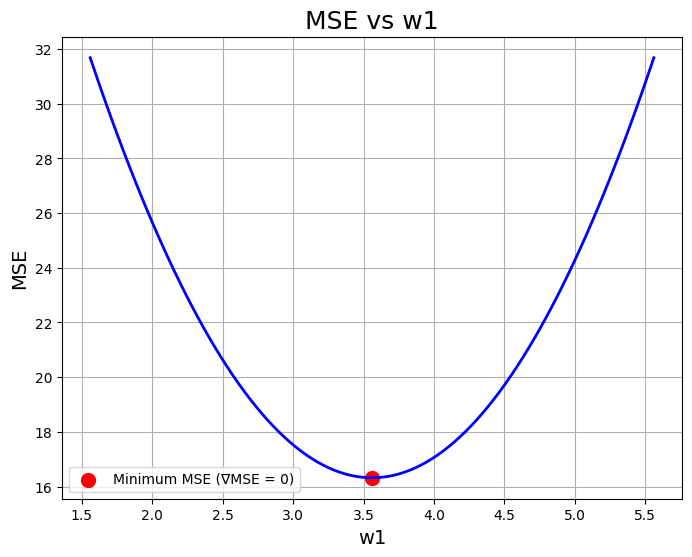

Optimal y-intercept: -0.4614, Optimal Production Budget: 3.5603


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load and preprocess data
INPUT_FILE = "movie_budgets.csv"
df = pd.read_csv(INPUT_FILE)
df["Worldwide Gross"] = df["Worldwide Gross"].replace('[\$,]', '', regex=True).astype(float)
df["Production Budget"] = df["Production Budget"].replace('[\$,]', '', regex=True).astype(float)
df["Production Budget"] /= 1e8
df["Worldwide Gross"] /= 1e8
X = df["Production Budget"].values
y = df["Worldwide Gross"].values
n = len(y)
beta_1_optimal = np.sum((X - X.mean()) * (y - y.mean())) / np.sum((X - X.mean()) ** 2)
beta_0_optimal = y.mean() - beta_1_optimal * X.mean()
beta_1_range = np.linspace(beta_1_optimal - 2, beta_1_optimal + 2, 100)
MSE = np.zeros_like(beta_1_range)

for i, beta_1 in enumerate(beta_1_range):
    y_pred = beta_0_optimal + beta_1 * X
    MSE[i] = np.mean((y - y_pred) ** 2)
plt.figure(figsize=(8, 6))
plt.plot(beta_1_range, MSE, color='blue', linewidth=2)
plt.scatter(beta_1_optimal, np.min(MSE), color='red', s=100, label="Minimum MSE (∇MSE = 0)")
plt.title("MSE vs w1", fontsize=18)
plt.xlabel("w1", fontsize=14)
plt.ylabel("MSE", fontsize=14)
plt.legend()
plt.grid(True)
plt.show()
print(f"Optimal y-intercept: {beta_0_optimal:.4f}, Optimal Production Budget: {beta_1_optimal:.4f}")


# Adding new features (doemstic revenue)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


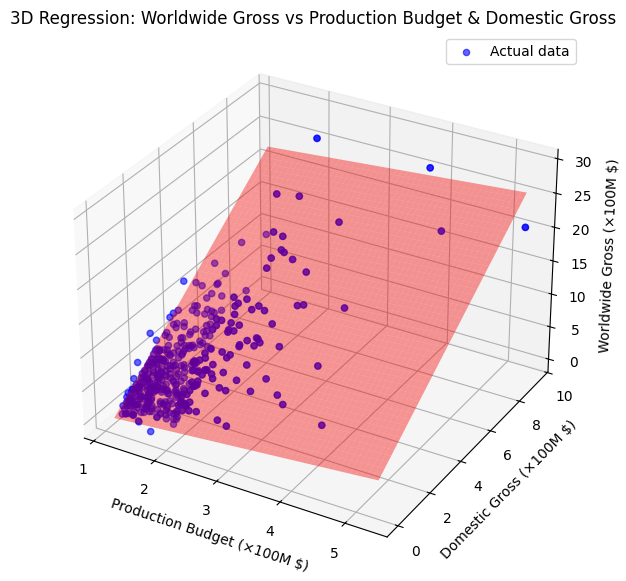

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D

# Load the CSV file
INPUT_FILE = "movie_budgets.csv"
df = pd.read_csv(INPUT_FILE)

# Convert "Release Date" to datetime format
df["Release Date"] = pd.to_datetime(df["Release Date"], errors="coerce")

# Convert financial columns to numeric (remove "$" and ",")
for col in ["Worldwide Gross", "Production Budget", "Domestic Gross"]:
    df[col] = df[col].replace('[\$,]', '', regex=True).astype(float)

# Filter: Keep movies where at least one revenue source is nonzero and released before 2025
df = df[(df["Worldwide Gross"] > 0) | (df["Domestic Gross"] > 0)]
df = df[df["Release Date"].dt.year < 2025]

# Convert values to 100M units
df["Production Budget"] /= 1e8
df["Worldwide Gross"] /= 1e8
df["Domestic Gross"] /= 1e8

# Ensure df is not empty
if df.empty:
    raise ValueError("DataFrame is empty after filtering. Check dataset contents.")

# Prepare features (using both Production Budget & Domestic Gross)
X = df[['Production Budget', 'Domestic Gross']]
y = df['Worldwide Gross']

# Ensure there are valid samples
if X.shape[0] == 0:
    raise ValueError("No valid data points remain for training.")

# Train model
model = LinearRegression()
model.fit(X, y)

# Generate predictions for regression plane
x_range = np.linspace(X["Production Budget"].min(), X["Production Budget"].max(), 50)
y_range = np.linspace(X["Domestic Gross"].min(), X["Domestic Gross"].max(), 50)
X_grid, Y_grid = np.meshgrid(x_range, y_range)
Z_grid = (model.intercept_ +
          model.coef_[0] * X_grid +
          model.coef_[1] * Y_grid)

# Create best-fit regression line (diagonal trend)
line_X = np.linspace(X["Production Budget"].min(), X["Production Budget"].max(), 50)
line_Y = np.linspace(X["Domestic Gross"].min(), X["Domestic Gross"].max(), 50)
line_Z = model.predict(np.column_stack((line_X, line_Y)))

# Create 3D plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of actual data points
ax.scatter(df['Production Budget'], df['Domestic Gross'], df['Worldwide Gross'],
           color='blue', alpha=0.6, label='Actual data')

# Plot regression plane
ax.plot_surface(X_grid, Y_grid, Z_grid, color='red', alpha=0.4)


# Labels and Title
ax.set_xlabel('Production Budget (×100M $)')
ax.set_ylabel('Domestic Gross (×100M $)')
ax.set_zlabel('Worldwide Gross (×100M $)')
ax.set_title('3D Regression: Worldwide Gross vs Production Budget & Domestic Gross')

plt.legend()
plt.show()


In [10]:
# Train linear regression model
model = LinearRegression()
model.fit(X, y)

# Get coefficients
intercept = model.intercept_
coef_budget = model.coef_[0]  # Coefficient for Production Budget
coef_domestic = model.coef_[1]  # Coefficient for Domestic Gross

# Print equation of the regression plane
print(f"Worldwide Gross = {intercept:.2f} + ({coef_budget:.4f}) * Production Budget + ({coef_domestic:.4f}) * Domestic Gross")


Worldwide Gross = -0.54 + (0.7900) * Production Budget + (2.3478) * Domestic Gross
